### Данная тетрадка подготовлена Степаном Зиминым (tg @smzimin) и используется с его согласия. 

# Backtesting

## Content

- Data
    - Upload and visualize data
    - Preprocess prices and transform to returns
    - Plot histograms and Q-Q plots
    
    
- Recap: Market risk metrics
    - Value-at-Risk
    - Expected Shortfall
    
    
- Calculating VaR over historical period
    - Historical Simulation
    - Parametric estimation: Normal, t-Student
    
    
- Backtesting VaR curve
    - Bernoulli coverage test
    - Independence test
    
    
    
## References
- [Risk Measures](https://www.financialriskforecasting.com/files/Danielsson-Financial-Risk-Forecasting-Slides-4.pdf)
- [Univariate Volatility Modeling](https://www.financialriskforecasting.com/files/Danielsson-Financial-Risk-Forecasting-Slides-2.pdf)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

import warnings
warnings.filterwarnings("ignore")

## Data

### Upload and visualize data

**Task: download daily data for any company you want, so that you have at least 2 years of history**

In [2]:
import yfinance as yf

prices = yf.download('AAPL','2016-01-01','2022-03-20')

prices.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.074741,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.471443,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.012112,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.040899,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.157448,283192000


**Task: do a plot of daily price**


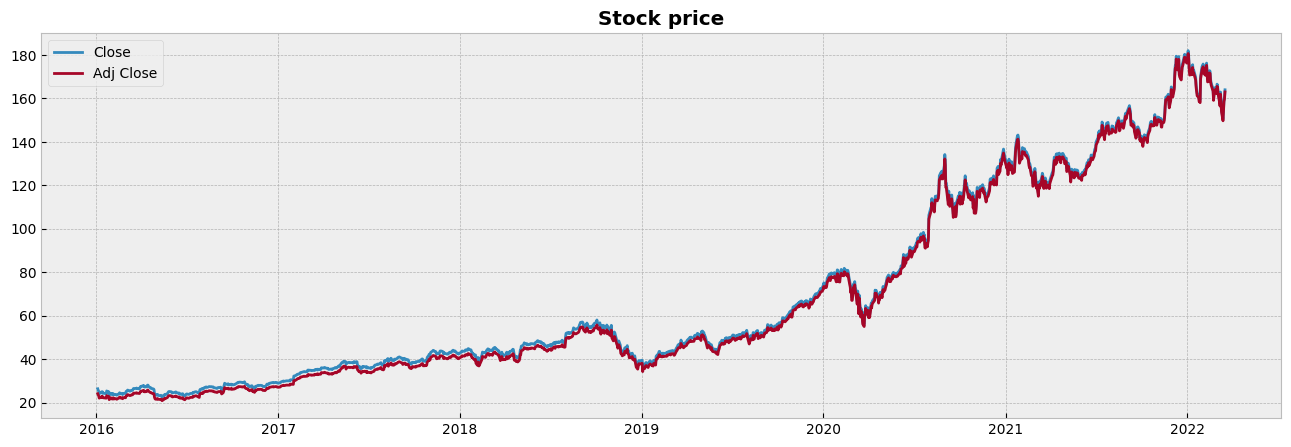

In [3]:
plot_fields =  ['Close', 'Adj Close']

fig = plt.figure(figsize=(16, 5))

plt.plot(prices[plot_fields])
plt.legend(plot_fields)

plt.title("Stock price", weight="bold")

plt.show()

### Preprocess prices and transform to returns

**Task: convert datetime index to period**

In [4]:
print(prices.index)

prices.index = prices.index.to_period(freq='d')

print(prices.index)

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18'],
              dtype='datetime64[ns]', name='Date', length=1564, freq=None)
PeriodIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
             '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
             '2016-01-14', '2016-01-15',
             ...
             '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
             '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
             '2022-03-17', '2022-03-18'],
            dtype='period[D]', name='Date', length=1564)


**Task: take only Adj Close price and convert it to returns**

In [5]:
price = prices['Adj Close']

price.head()

Date
2016-01-04    24.074741
2016-01-05    23.471443
2016-01-06    23.012112
2016-01-07    22.040899
2016-01-08    22.157448
Freq: D, Name: Adj Close, dtype: float64

In [6]:
ret = price.pct_change()

ret

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042204
2016-01-08    0.005288
                ...   
2022-03-14   -0.026562
2022-03-15    0.029677
2022-03-16    0.029015
2022-03-17    0.006454
2022-03-18    0.020919
Freq: D, Name: Adj Close, Length: 1564, dtype: float64

In [7]:
ret = ret.dropna()

**Task: plot a graph of daily returns**

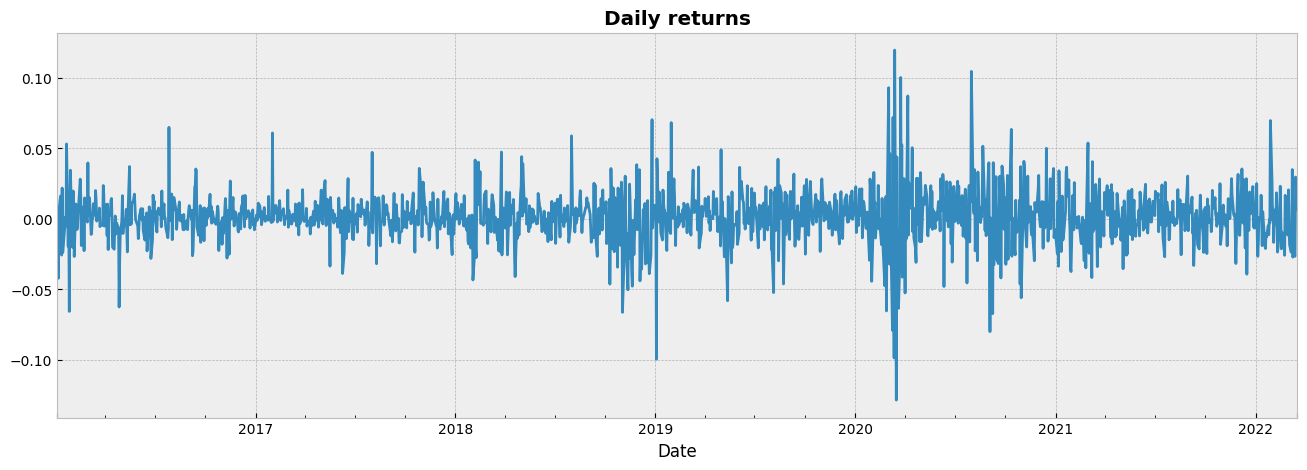

In [8]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
plt.title("Daily returns", weight="bold")

plt.show()

In [10]:
import scipy.stats as ss


### Plot histograms and Q-Q plots -- *no tasks in this section! just look at it and discuss what you see*

Explore the Returns Distribution

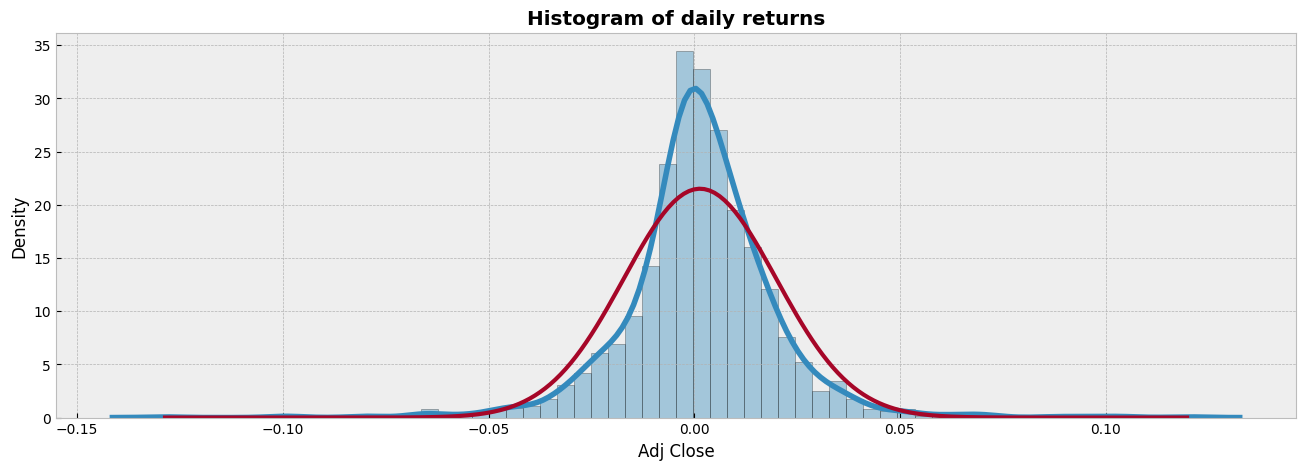

In [11]:
fig = plt.figure(figsize=(16, 5))

x = np.linspace(ret.min(), ret.max(), 200)

sns.distplot(ret, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

params_norm = ss.norm.fit(ret)
y_pdf = ss.norm.pdf(x, *params_norm)
plt.plot(x, y_pdf, linewidth=3)

plt.title("Histogram of daily returns", weight="bold")

plt.show()

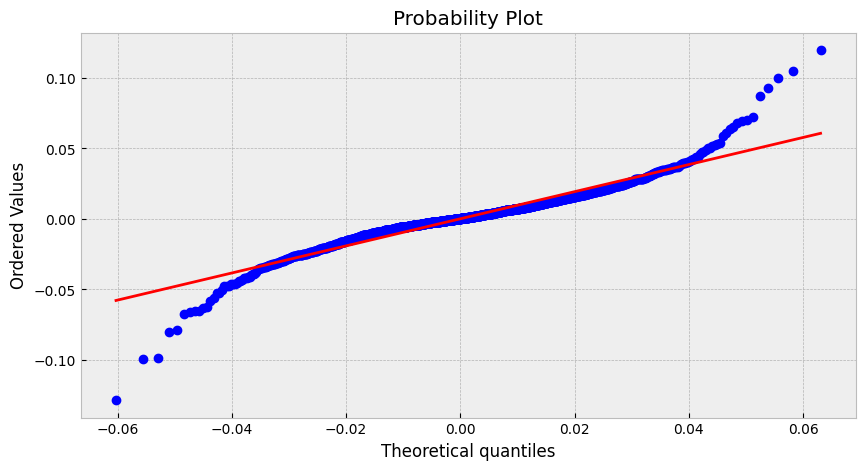

In [13]:
fig = plt.figure(figsize=(10, 5))

ss.probplot(ret, dist=ss.norm(*params_norm), plot=plt)

plt.show()

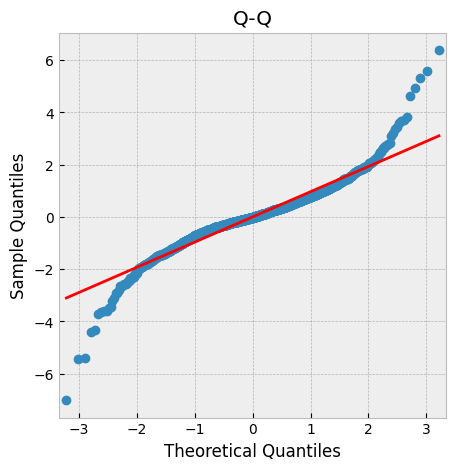

In [13]:
import statsmodels.graphics.gofplots
pp = statsmodels.graphics.gofplots.ProbPlot(ret, fit=True)

fig = plt.figure(figsize=(17, 5))

plt1 = fig.add_subplot(1,3,1)

pp.qqplot(ax=plt1.axes, line='r')
plt1.set_title('Q-Q')

plt.show()

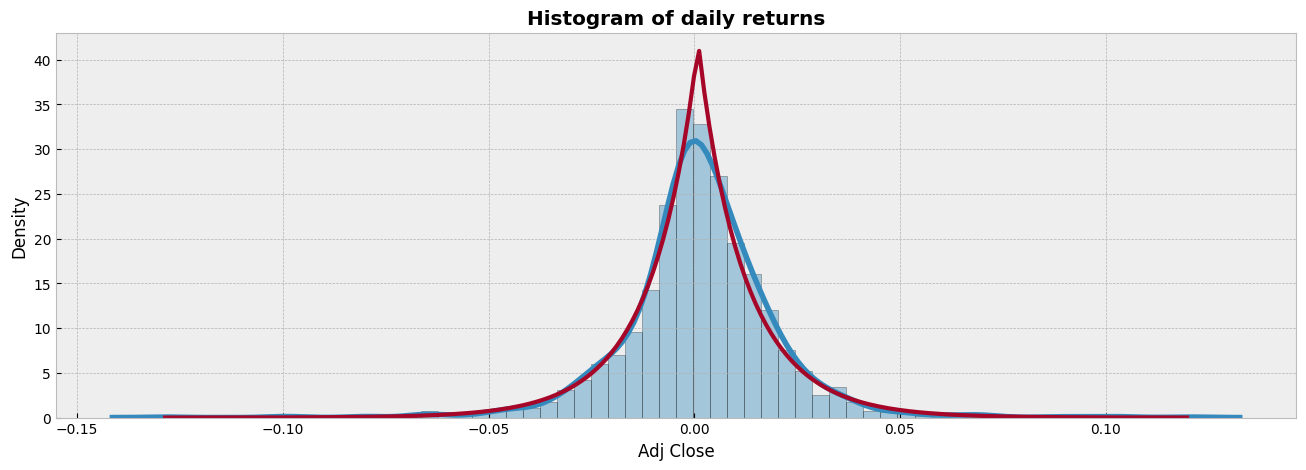

In [14]:
fig = plt.figure(figsize=(16, 5))

x = np.linspace(ret.min(), ret.max(), 200)

sns.distplot(ret, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

params_gennorm = ss.gennorm.fit(ret)
y_pdf = ss.gennorm.pdf(x, *params_gennorm)
plt.plot(x, y_pdf, linewidth=3)

plt.title("Histogram of daily returns", weight="bold")

plt.show()

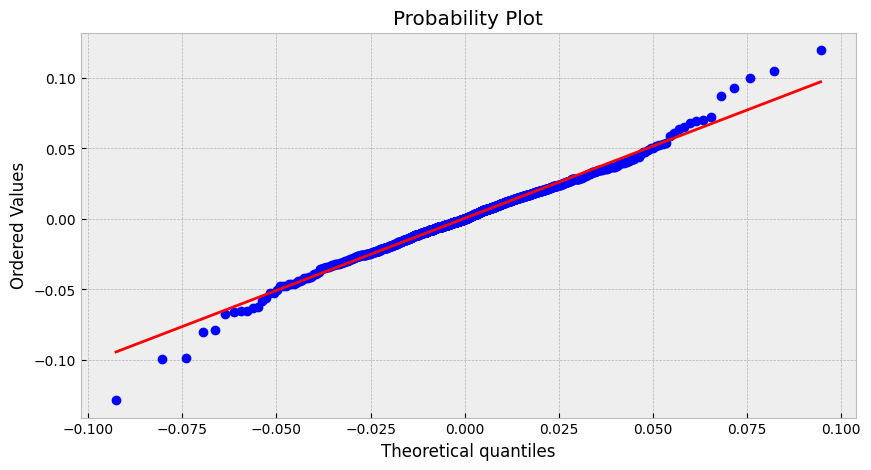

In [15]:
fig = plt.figure(figsize=(10, 5))

ss.probplot(ret, dist=ss.gennorm(*params_gennorm), plot=plt)

plt.show()

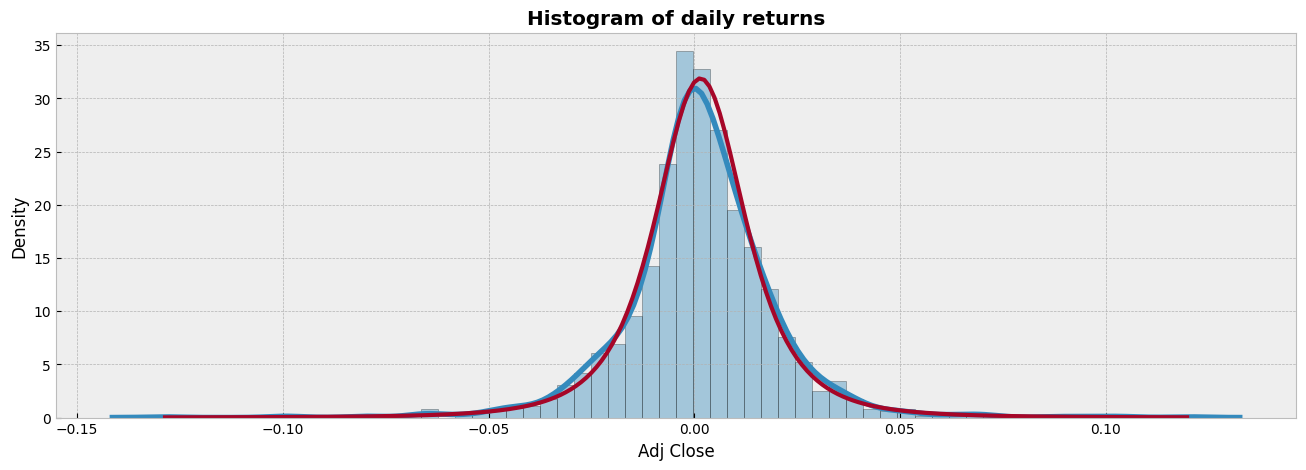

In [16]:
fig = plt.figure(figsize=(16, 5))

x = np.linspace(ret.min(), ret.max(), 200)

sns.distplot(ret, hist=True, kde=True, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

params_nct = ss.nct.fit(ret)
y_pdf = ss.nct.pdf(x, *params_nct)
plt.plot(x, y_pdf, linewidth=3)

plt.title("Histogram of daily returns", weight="bold")

plt.show()

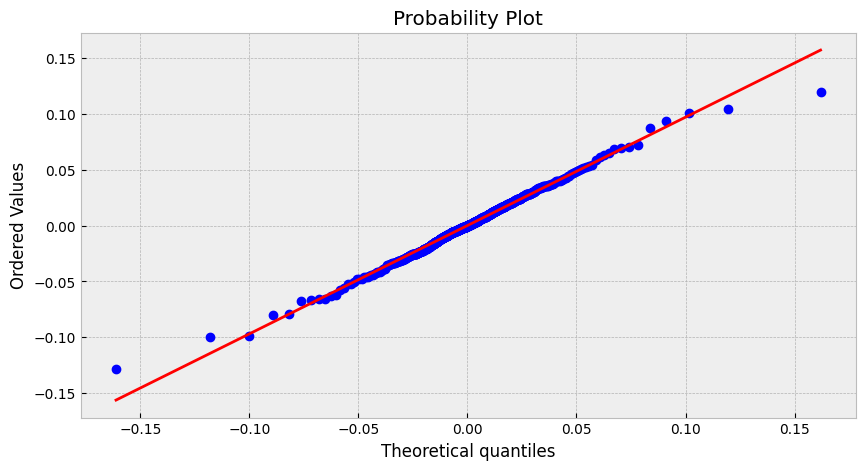

In [17]:
fig = plt.figure(figsize=(10, 5))

ss.probplot(ret, dist=ss.nct(*params_nct), plot=plt)

plt.show()

This doesn't look very much like a normal distribution... let's check.

In [30]:

params_norm = ss.norm.fit(ret)
print(params_norm)

(0.001396229773406557, 0.01854394172228572)


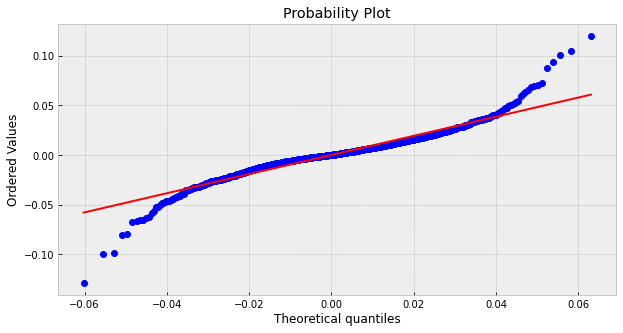

In [18]:
fig = plt.figure(figsize=(10, 5))

ss.probplot(ret, dist=ss.norm(*params_norm), plot=plt)

plt.show()

By the way, the documentation for `ss.probplot` is misleading. This is a Q-Q plot up to the axes ticks. At least `statsmodels` calls this a Q-Q plot.

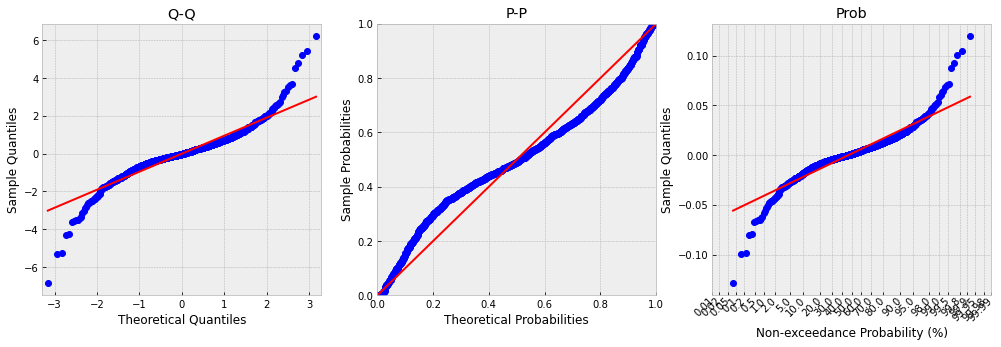

In [12]:
import statsmodels.graphics.gofplots
pp = statsmodels.graphics.gofplots.ProbPlot(ret, fit=True)

fig = plt.figure(figsize=(17, 5))

plt1 = fig.add_subplot(1,3,1)
plt2 = fig.add_subplot(1,3,2)
plt3 = fig.add_subplot(1,3,3)

pp.qqplot(ax=plt1.axes, line='r')
plt1.set_title('Q-Q')

pp.ppplot(ax=plt2.axes, line='45')
plt2.set_title('P-P')

pp.probplot(ax=plt3.axes, line='r')
plt3.set_title('Prob')

plt.show()

## Market risk metrics  -- *no tasks in this section, just a recap! just look at it and discuss what you see*


### Value-at-Risk definition and visualization


Value-at-Risk is the loss on a trading portfolio such that there is a probability $q$ of losses equaling or exceeding VaR in a given trading period and a $(1 − q)$ probability of losses being lower than the VaR.

Mathematically, VaR is a quantile on the distribution of P/L (profit and loss), or returns $r_t$:

$$\mathbf{P}[r_{t+h} \le VaR_{t+h}(q)] = q$$



VaR depends on:
1. The probability of losses exceeding VaR, $p$
2. The holding period $h$, the time period over which losses may occur
3. The probability distribution of the P/L of the portfolio

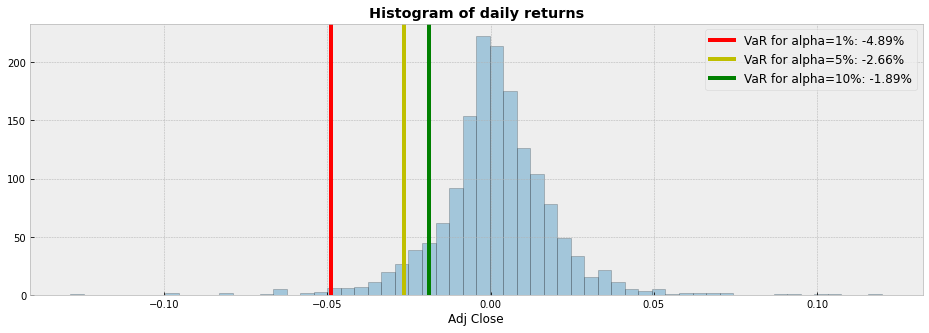

In [9]:
VaR_HS_01 = ret.quantile(0.01)
VaR_HS_05 = ret.quantile(0.05)
VaR_HS_10 = ret.quantile(0.10)

fig = plt.figure(figsize=(16, 5))

sns.distplot(ret, hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.axvline(x=VaR_HS_01, linewidth=4, color="r")
plt.axvline(x=VaR_HS_05, linewidth=4, color="y")
plt.axvline(x=VaR_HS_10, linewidth=4, color="g")

plt.title("Histogram of daily returns", weight="bold")

plt.legend(['VaR for alpha=1%: {:.2f}%'.format(100*VaR_HS_01),
            'VaR for alpha=5%: {:.2f}%'.format(100*VaR_HS_05),
            'VaR for alpha=10%: {:.2f}%'.format(100*VaR_HS_10)], fontsize=12)

plt.show()

### Expected Shortfall definition and visualization


Expected Shortfall (ES) is expected loss conditional on VaR being violated (i.e. expected return $r_t$, when it is lower than negative VaR). It is aware of the shape of the tail distribution while VaR is not

Mathematically:

$$ES = \mathbf{E}[r_{t+h} | r_{t+h} \le VaR_{t+h}(q)]$$

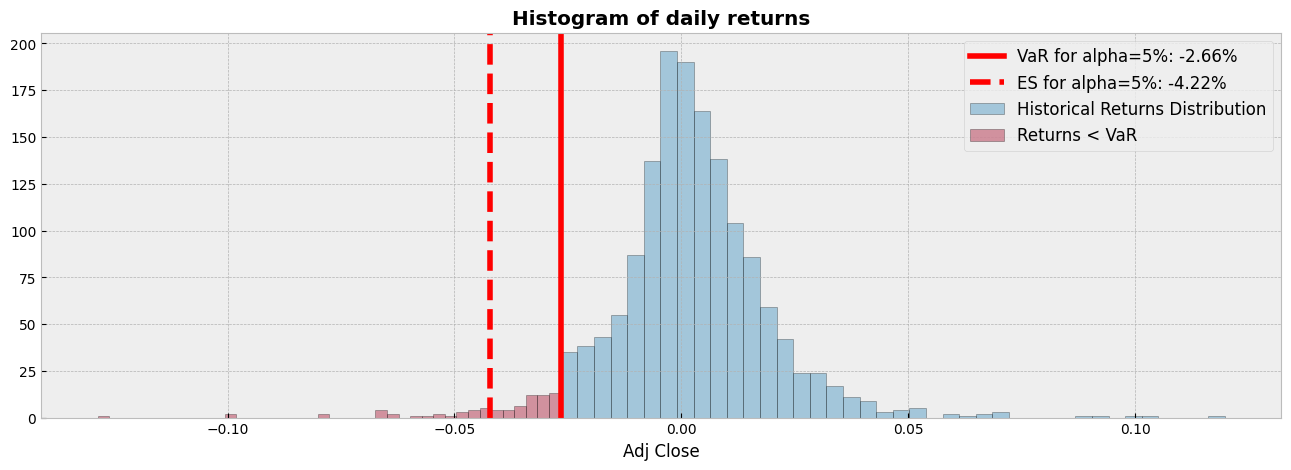

In [19]:
alpha = 0.05

VaR_HS = ret.quantile(alpha)
ES_HS = ret[ret < VaR_HS].mean()

fig = plt.figure(figsize=(16, 5))

sns.distplot(ret[ret >= VaR_HS], hist=True, kde=False, 
             bins=40,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(ret[ret < VaR_HS], hist=True, kde=False, 
             bins=40,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.axvline(x=VaR_HS, linewidth=4, color="r")
plt.axvline(ES_HS, linewidth=4, color='red', linestyle='dashed')

plt.title("Histogram of daily returns", weight="bold")
plt.legend(['VaR for alpha=5%: {:.2f}%'.format(100*VaR_HS),
            'ES for alpha=5%: {:.2f}%'.format(100*ES_HS),
            'Historical Returns Distribution', 
            'Returns < VaR'], fontsize=12)

plt.show()

## Calculating VaR over historical period

### Historical Simulation

Assumes that one of the observations in the estimation window will be the next days return, therefore

- VaR is the $q$'th smallest return, aka $q$'th quantile
- ES is an average of historical returns that are lower than VaR

**Task: calculate VaR curve using Historical Simulation**

Steps are:
- fix a window of length $T_w=252$
- fix some $\alpha \in (1\%, 10\%)$
- in a loop over days $t$ from $T_w+1$ to the latest day $T$
    - calculate your $VaR_t$ estimate using historical data from $t-T_w$ to $t-1$ and save to array

In [22]:
def calculate_VaR_HS(ret, alpha=0.05):

    return ret.quantile(alpha)

In [23]:
def calc_VaR(r, VaR_fun, L_history=252, level=0.05):
    VaR = np.full(r.size, np.nan)
    
    for i in range(L_history, len(r)):
        history = r[i - L_history: i]
        VaR[i] = VaR_fun(history, level)
        
    return pd.Series(data=VaR, index=r.index, name=VaR_fun.__name__)

In [24]:
VaR_HS = calc_VaR(ret, calculate_VaR_HS, L_history=50, level=alpha)

VaR_HS

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2022-03-14   -0.024984
2022-03-15   -0.026248
2022-03-16   -0.026248
2022-03-17   -0.026248
2022-03-18   -0.026248
Freq: D, Name: calculate_VaR_HS, Length: 1563, dtype: float64

**Task: plot historical returns and VaR curve**

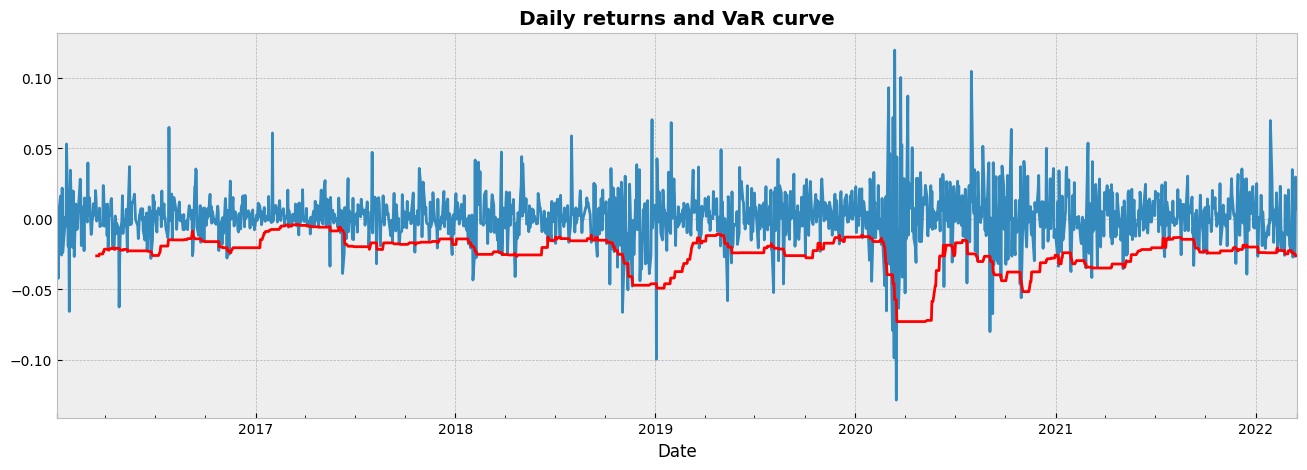

In [25]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
VaR_HS.plot(color='r')

plt.title("Daily returns and VaR curve", weight="bold")

plt.show()

### Parametric estimation

In the following approaches we do not assume any correlations between $r_t$ and $r_{t+h}$, for example $r_{t+1} = \alpha r_{t} + \epsilon_t$ or something like this.

Instead, we are trying to model $r_t$ with some univariate distribution

$$r_t \sim F(x; \theta)$$

#### Normal distribution

Here we are trying to model $r_t$ with Normal distribution

$$r_t \sim N(x; \mu, \sigma^2)$$

**Task: calculate VaR curve using Normal distribution**


In [26]:
def calculate_VaR_normal(ret, alpha=0.05):

    params_norm = ss.norm.fit(ret)
    
    return ss.norm.ppf(alpha, *params_norm)

In [27]:
VaR_norm = calc_VaR(ret, calculate_VaR_normal, L_history=252, level=alpha)

#### t-Student distribution

And here - with t-Student distribution

$$r_t \sim t(\mu, \sigma^2, df)$$

**Task: calculate VaR curve using t-Student distribution**

In [28]:
def calculate_VaR_t(ret, alpha=0.05):

    params_t = ss.t.fit(ret)
    
    return ss.t.ppf(alpha, *params_t)

In [29]:
VaR_t = calc_VaR(ret, calculate_VaR_t, L_history=252, level=alpha)

**Task: plot historical returns and 3 VaR curves -- for HS, Normal and t-Student distributions**

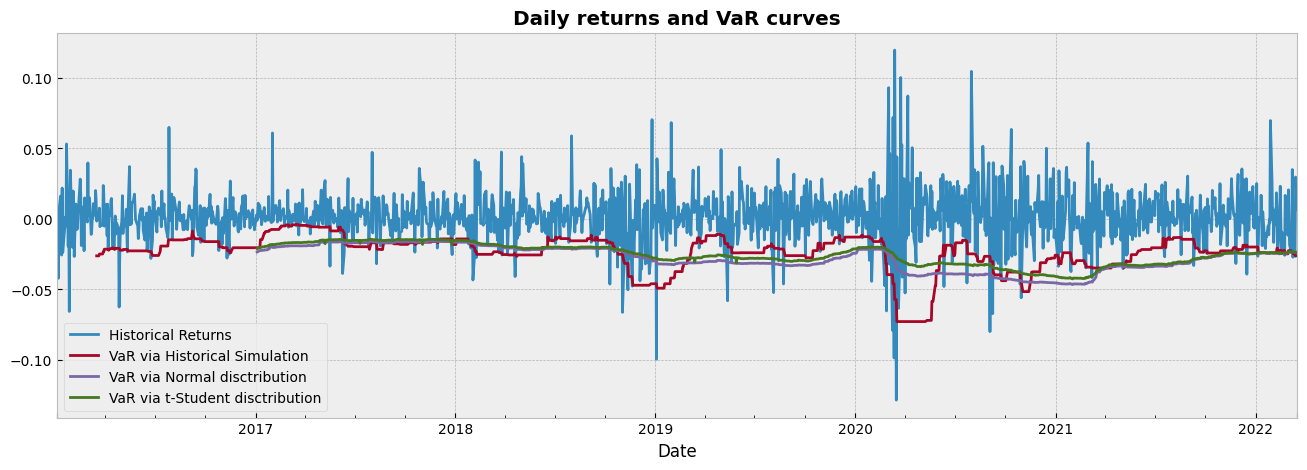

In [30]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
VaR_HS.plot()
VaR_norm.plot()
VaR_t.plot()

plt.title("Daily returns and VaR curves", weight="bold")

plt.legend(['Historical Returns',
            'VaR via Historical Simulation',
            'VaR via Normal disctribution',
            'VaR via t-Student disctribution'])

plt.show()

## Backtesting VaR curve

### Bernoulli coverage test

Does the expected number of violations $\eta$, as given by $q$ match the observed number of violations?
- For a VaR(1%) backtest, we would expect to observe a violation 1% of the time
- If, violations are observed more often the VaR model is underestimating risk
- And similarly if we observe too few violations


Let 
- $\eta_t$ be one violation for one trading day -- a random variable which takes values in {0, 1},
- $v = \sum_{t=1}^T \eta_t$ be the total number of violations,
- $\hat{q} = \frac{v}{T}$ -- observed fraction of violations


The null hypothesis for VaR violations is:

$$ H_0: \eta_t \sim B(q)$$

The unrestricted likelihood function:

$$ L_U(\hat{q}) = (1-\hat{q})^{T-v}\hat{q}^{v}$$

Under $H_0, q = \hat{q}$, so the restricted likelihood function is:

$$ L_R(q) = (1-q)^{T-v}q^{v}$$


So now the testing of $q = \hat{q}$ is equivalent to testing $L_U=L_R$, and we can look at a likelihood ratio (LR)

$$LR = 2(\log L_R(q) − \log L_U(\hat{q})) \sim \chi^2(1)$$ 

For example, choosing a 5% significance level for the test, the null hypothesis is rejected if LR > 3.84

**Task: implement a function for Bernoulli coverage test, use it to test our VaR violations**

In [33]:
def bern_test(p, v):
    
    lv = len(v)
    sv = sum(v)
    al = np.log(p)*sv + np.log(1-p)*(lv-sv)
    
    bl = np.log(sv/lv)*sv + np.log(1-sv/lv)*(lv-sv)
    
    return (-2*(al-bl))

### Independence test


Violations should not follow each other, because if they do, we can predict a violation today if there was one yesterday


Formulas -- please find them [here, page 77](https://www.financialriskforecasting.com/files/Danielsson-Financial-Risk-Forecasting-Slides-8.pdf)


**Task: implement a function for Independence test, use it to test our VaR clustering**


In [34]:
def ind_test(V):
    
    J = np.full([len(V),4], 0)
    for i in range(1,len(V)-1):
        J[i,0] = (V[i-1] == 0) & (V[i] == 0)
        J[i,1] = (V[i-1] == 0) & (V[i] == 1)
        J[i,2] = (V[i-1] == 1) & (V[i] == 0)
        J[i,3] = (V[i-1] == 1) & (V[i] == 1)
        
    V_00 = sum(J[:,0])
    V_01 = sum(J[:,1])
    V_10 = sum(J[:,2])
    V_11 = sum(J[:,3])
    p_00=V_00/(V_00+V_01)
    p_01=V_01/(V_00+V_01)
    p_10=V_10/(V_10+V_11)
    p_11=V_11/(V_10+V_11)
    hat_p = (V_01+V_11)/(V_00+V_01+V_10+V_11)
    al = np.log(1-hat_p)*(V_00+V_10) + np.log(hat_p)*(V_01+V_11)
    bl = np.log(p_00)*V_00 + np.log(p_01)*V_01 + np.log(p_10)*V_10 + np.log(p_11)*V_11
    
    return (-2*(al-bl))

**Task: implement one function which combines both tests and prints info and final decision**

In [35]:
def backtest_results(ret, var_curve, alpha, significance=0.95):
    
    idx = var_curve.notna()
    
    violations = ret[idx] < var_curve[idx]
    
    coverage = bern_test(p=alpha, v=violations) < ss.chi2.ppf(significance, 1)
    independence = ind_test(violations) < ss.chi2.ppf(significance, 1)
        
    print('Target share of violations: {:.2f}%'.format(100*alpha))
    print('Observed share of violations: {:.2f}%'.format(100*violations.mean()))
    
    print('')
    
    if coverage:
        print('Test for coverage is passed')
    else:
        print('Test for coverage isn\'t passed')
        
    print('')
        
    if independence:
        print('Test for independence is passed')
    else:
        print('Test for independence isn\'t passed')

In [38]:
backtest_results(ret, VaR_t, 0.05)

Target share of violations: 5.00%
Observed share of violations: 6.33%

Test for coverage isn't passed

Test for independence isn't passed


## Optional stuff -- Backtesting with Extreme Value Theory


#### Block maxima and Generalized Extreme Value Distribution (GEV)

Resample losses with desired period (e.g. weekly)

In [39]:
def calculate_VaR_maximas(ret, alpha=0.05):
    
    maximas = ret.resample('W').min()
    
    params_genextreme = ss.genextreme.fit(maximas)
    c, loc, scale = params_genextreme
    xi = -c

    return loc + scale / xi * (1 - (-5*np.log(1-alpha)) ** (-xi) )

#### Excess Distribution Over a Threshold

In [40]:
def calculate_VaR_pot(ret, alpha=0.05):
    
    u = ret.quantile(0.2)
    ret_tail = ret[ret <= u]

    c, loc, scale = ss.genpareto.fit(-ret_tail, loc=0)
    
    return u - scale / c * ((alpha/(ret <= u).mean())**(-c) - 1)

In [41]:
VaR_pot = calc_VaR(ret, calculate_VaR_pot, L_history=252, level=alpha)
VaR_maximas = calc_VaR(ret, calculate_VaR_maximas, L_history=252, level=alpha)

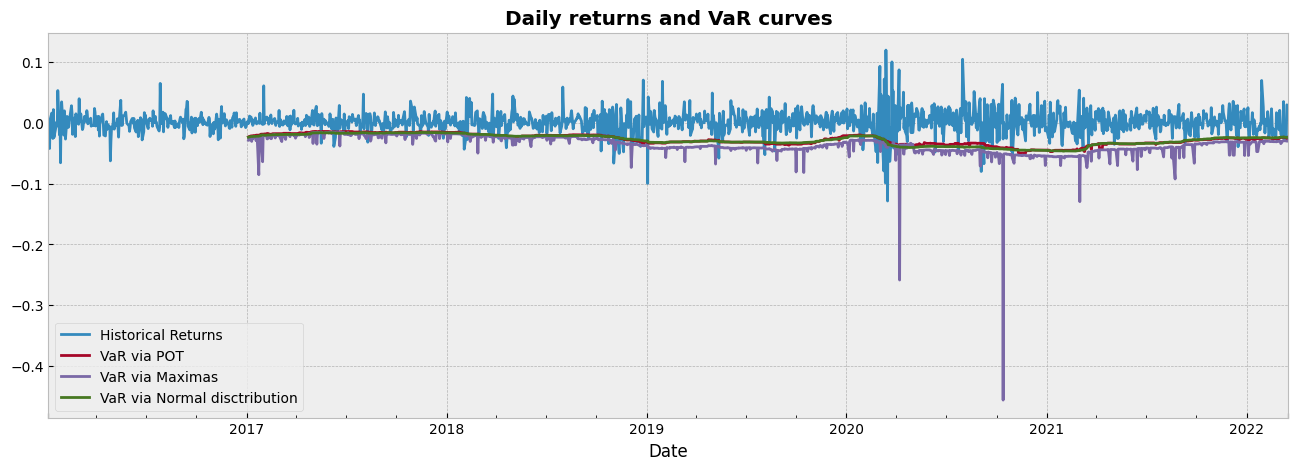

In [42]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
VaR_pot.plot()
VaR_maximas.plot()
VaR_norm.plot()

plt.title("Daily returns and VaR curves", weight="bold")

plt.legend(['Historical Returns',
            'VaR via POT',
            'VaR via Maximas', 
           'VaR via Normal disctribution'])

plt.show()

In [43]:
backtest_results(ret, VaR_pot, 0.05)

Target share of violations: 5.00%
Observed share of violations: 5.64%

Test for coverage is passed

Test for independence isn't passed


In [44]:
backtest_results(ret, VaR_maximas, 0.05)

Target share of violations: 5.00%
Observed share of violations: 3.59%

Test for coverage isn't passed

Test for independence isn't passed
